In [1]:
mc.cores = parallel::detectCores()
#rstan_options(auto_write = TRUE)

library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


In [2]:
p <- list()
p$A <- c(0,0,10,0,0)
p$B <- c(0,1,8,1,0)
p$C <- c(0,2,6,2,0)
p$D <- c(1,2,4,2,1)
p$E <- c(2,2,2,2,2)

In [3]:
p_norm <- lapply( p , function(q) q/sum(q))

In [4]:
( H <- sapply( p_norm , function(q) -sum(ifelse(q==0,0,q*log(q))) ) )

A         B         C         D         E 
0.0000000 0.6390319 0.9502705 1.4708085 1.6094379

In [5]:
ways <- c(1,90,1260,37800,113400)
logwayspp <- log(ways)/10

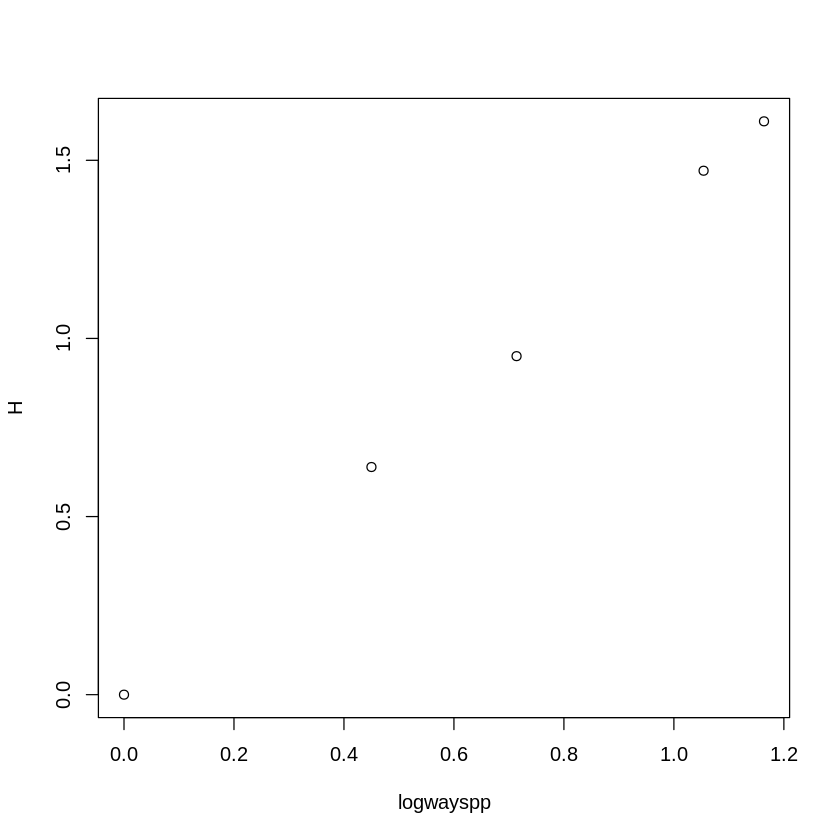

In [6]:
plot(H ~ logwayspp)

In [7]:
# build list of the candidate distributions
p <- list()
p[[1]] <- c(1/4,1/4,1/4,1/4)
p[[2]] <- c(2/6,1/6,1/6,2/6)
p[[3]] <- c(1/6,2/6,2/6,1/6)
p[[4]] <- c(1/8,4/8,2/8,1/8)
# compute expected value of each
sapply( p , function(p) sum(p*c(0,1,1,2)) )

[1] 1 1 1 1

In [8]:
# compute entropy of each distribution
sapply( p , function(p) -sum( p*log(p) ) )

[1] 1.386294 1.329661 1.329661 1.213008

In [9]:
p <- 0.7
( A <- c( (1-p)^2 , p*(1-p) , (1-p)*p , p^2 ) )

[1] 0.09 0.21 0.21 0.49

In [10]:
-sum( A*log(A) )

[1] 1.221729

In [11]:
sim.p <- function(G=1.4) {
x123 <- runif(3)
x4 <- ( (G)*sum(x123)-x123[2]-x123[3] )/(2-G)
z <- sum( c(x123,x4) )
p <- c( x123 , x4 )/z
list( H=-sum( p*log(p) ) , p=p )
}

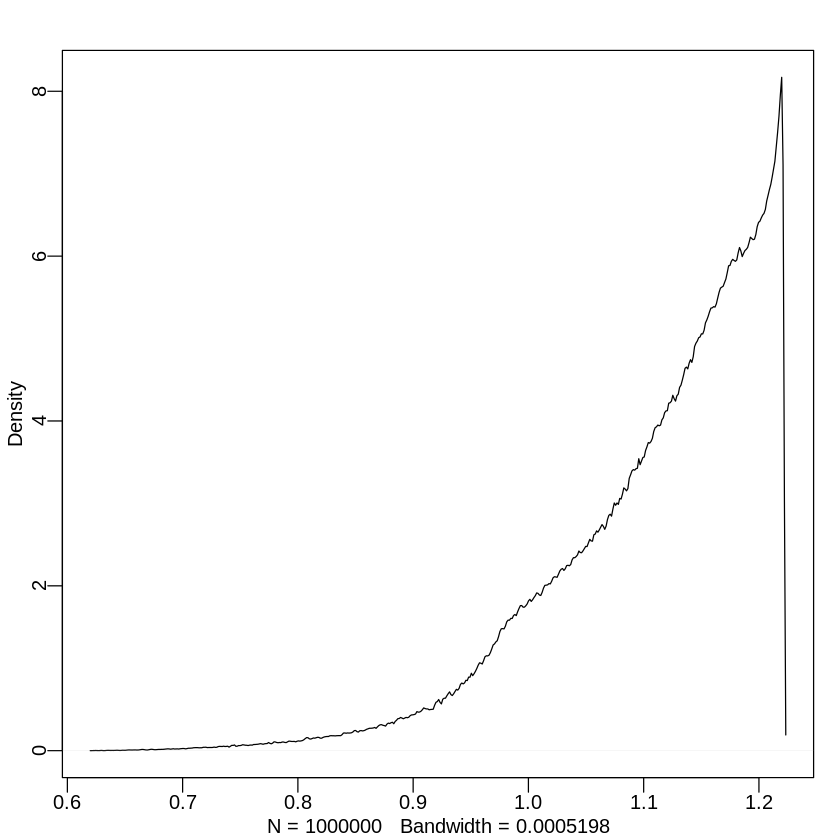

In [12]:
H <- replicate( 1e6 , sim.p(1.4) )
dens( as.numeric(H[1,]) , adj=0.1 )

In [13]:
entropies <- as.numeric(H[1,])
distributions <- H[2,]

In [14]:
max(entropies)

[1] 1.221728

In [15]:
distributions[ which.max(entropies) ]

[[1]]
[1] 0.08999028 0.21020976 0.20980968 0.48999028